In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['font.family']=['Cambria'] # 用来正常显示中文标签

plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [3]:
results_dir = "./results"
values = defaultdict(list)
errors = defaultdict(list)
for c in [3, 8]:
    for fn in ['emb'] + list(range(9)):
        lines = open(os.path.join(results_dir, f"{str(fn)}-{c}"+".eval"), "r").readlines()
        for line in lines:
            avg, stdev, _min, _max = line.strip().split()
            values[c].append(float(avg))
            errors[c].append(float(stdev))

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


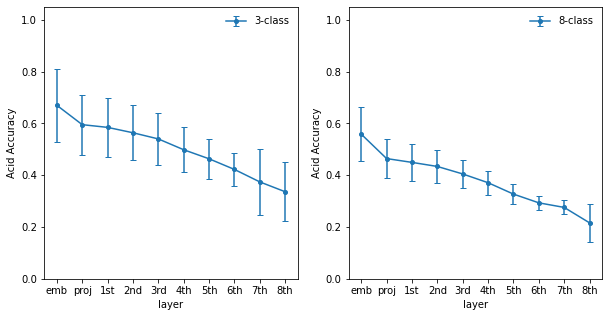

In [4]:
fig, subs = plt.subplots(1, 2, figsize=(10, 5))
xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]

for idx, c in enumerate([3, 8]):
    subs[idx].set_xlim(0.5, 10.5, 1)
    subs[idx].set_ylim(0, 1.05)
    subs[idx].set_xlabel("layer")
    subs[idx].set_ylabel("Acid Accuracy")
    subs[idx].set_xticks(range(1, 11), xticks)

    subs[idx].errorbar(xs, values[c], yerr=errors[c], label=f"{c}-class", capsize=3, marker="o", ms=4)
    
    subs[idx].legend(frameon=False)
# plt.savefig("./figure.pdf", bbox_inches='tight')

